# CNN Experiments

We train CNNs on two feature maps (raw data and Fourier-transformed data), using 10-fold cross-validation to select hyperparameters.

## Contents
1. [Set-Up](#Set-Up)
2. [Data](#Data)
3. [Raw Data](#Raw-Data)
4. [Fourier Transform](#Fourier-Transform)

## Set-Up
- Download the [Epileptic Seizure Recognition Data Set](http://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition) and place it in the current directory.

In [ ]:
import numpy as np
import pandas as pd
import util

## Data
We first parse and normalize our dataset.

In [2]:
X, y, ids, chunks = util.parse_data()
X = X.reshape(X.shape[0], X.shape[1], 1)
classes = np.unique(y)

We split our data 80/20 train/test.

In [3]:
X_train, y_train, ids_train, X_test, y_test, ids_test = util.split_data(X, y, ids, seed=0)

We set up scoring.

In [4]:
scoring = util.get_scoring_metrics(classes)

## Raw Data

In [ ]:
r_cv_results, r_acc, r_f1_macro, r_f1_per_class, r_cm = util.evaluate_cnn(
    X_train, y_train, ids_train, X_test, y_test, classes, scoring)

In [15]:
r_cv_df = pd.DataFrame.from_dict(r_cv_results)
r_cv_df.to_csv('raw_cnn_cv_results.csv')
r_cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_dropout,param_epochs,param_window,params,split0_test_accuracy,...,split2_train_f1_class_5,split3_train_f1_class_5,split4_train_f1_class_5,split5_train_f1_class_5,split6_train_f1_class_5,split7_train_f1_class_5,split8_train_f1_class_5,split9_train_f1_class_5,mean_train_f1_class_5,std_train_f1_class_5
0,243.165640,10.040048,1.733574,0.182491,5,0.1,25,3,"{'batch_size': 5, 'dropout': 0.1, 'epochs': 25...",0.733696,...,0.865733,0.841936,0.832863,0.870408,0.855596,0.892248,0.866254,0.847608,0.858954,0.015714
1,320.609338,5.853768,2.727001,0.176760,5,0.1,25,5,"{'batch_size': 5, 'dropout': 0.1, 'epochs': 25...",0.725000,...,0.874413,0.888303,0.875568,0.876273,0.883328,0.805465,0.892520,0.826534,0.867352,0.026908
2,406.332103,3.347883,3.602921,0.182528,5,0.1,25,7,"{'batch_size': 5, 'dropout': 0.1, 'epochs': 25...",0.718478,...,0.970102,0.975490,0.939773,0.954756,0.958971,0.963387,0.937325,0.970732,0.958619,0.011938
3,285.866165,4.500053,3.666078,0.203441,5,0.2,25,3,"{'batch_size': 5, 'dropout': 0.2, 'epochs': 25...",0.726087,...,0.873526,0.874494,0.827164,0.775496,0.866119,0.856848,0.855784,0.846801,0.850146,0.028171
4,362.427044,4.642818,4.726712,0.204273,5,0.2,25,5,"{'batch_size': 5, 'dropout': 0.2, 'epochs': 25...",0.759783,...,0.814815,0.884354,0.887890,0.878090,0.881701,0.891755,0.878474,0.845333,0.874092,0.024997
5,465.254981,24.184238,5.801122,0.252365,5,0.2,25,7,"{'batch_size': 5, 'dropout': 0.2, 'epochs': 25...",0.708696,...,0.906118,0.973709,0.944615,0.934386,0.928660,0.953005,0.947644,0.940836,0.941060,0.016433
6,339.572345,6.939352,5.873148,0.233557,5,0.5,25,3,"{'batch_size': 5, 'dropout': 0.5, 'epochs': 25...",0.756522,...,0.876557,0.818489,0.852592,0.871362,0.800886,0.867352,0.851307,0.870167,0.851088,0.023639
7,420.307741,6.730728,7.395582,0.365159,5,0.5,25,5,"{'batch_size': 5, 'dropout': 0.5, 'epochs': 25...",0.760870,...,0.852404,0.850790,0.824772,0.857971,0.835237,0.859018,0.846008,0.835813,0.845448,0.010291
8,542.982995,57.824246,8.879771,0.580808,5,0.5,25,7,"{'batch_size': 5, 'dropout': 0.5, 'epochs': 25...",0.744565,...,0.916858,0.903797,0.920899,0.884234,0.849945,0.893971,0.912200,0.908425,0.902180,0.020515


In [7]:
print('Accuracy: ', r_acc)
print('Macro F1: ', r_f1_macro)
print('F1 per class: ', r_f1_per_class)

Accuracy:  0.7408695652173913
Macro F1:  0.7322055608698845
F1 per class:  [0.974122   0.53895275 0.64751958 0.77513228 0.7253012 ]


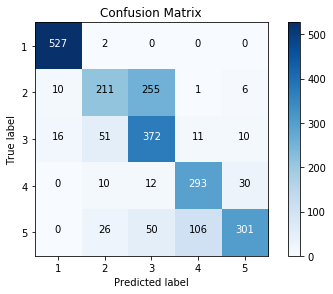

In [8]:
util.visualize_confusion_matrix(r_cm, classes)

## Fourier Transform

In [9]:
X_f_train = np.fft.rfft(X_train, axis=1).astype(float)
X_f_test = np.fft.rfft(X_test, axis=1).astype(float)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


In [ ]:
f_cv_results, f_acc, f_f1_macro, f_f1_per_class, f_cm = util.evaluate_cnn(X_f_train, y_train, ids_train, X_f_test, y_test, classes, scoring)

In [16]:
f_cv_df = pd.DataFrame.from_dict(f_cv_results)
f_cv_df.to_csv('fourier_cnn_cv_results.csv')
f_cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_dropout,param_epochs,param_window,params,split0_test_accuracy,...,split2_train_f1_class_5,split3_train_f1_class_5,split4_train_f1_class_5,split5_train_f1_class_5,split6_train_f1_class_5,split7_train_f1_class_5,split8_train_f1_class_5,split9_train_f1_class_5,mean_train_f1_class_5,std_train_f1_class_5
0,340.901578,9.306314,8.027716,0.309188,5,0.1,25,3,"{'batch_size': 5, 'dropout': 0.1, 'epochs': 25...",0.721739,...,0.945708,0.942556,0.941931,0.927685,0.910109,0.912929,0.953504,0.947923,0.939406,0.016045
1,374.546287,6.061480,9.138260,0.456814,5,0.1,25,5,"{'batch_size': 5, 'dropout': 0.1, 'epochs': 25...",0.688043,...,0.949489,0.962182,0.966456,0.964380,0.967081,0.973158,0.940890,0.969016,0.964620,0.010939
2,456.396541,40.730289,10.641900,1.269472,5,0.1,25,7,"{'batch_size': 5, 'dropout': 0.1, 'epochs': 25...",0.703261,...,0.984357,0.986536,0.987247,0.979290,0.983856,0.926566,0.979347,0.977223,0.977820,0.017502
3,462.358715,16.987634,11.979898,1.606661,5,0.2,25,3,"{'batch_size': 5, 'dropout': 0.2, 'epochs': 25...",0.682609,...,0.869793,0.921528,0.950030,0.931307,0.912291,0.930399,0.947334,0.954229,0.926871,0.023711
4,496.826175,50.249015,13.137796,1.541353,5,0.2,25,5,"{'batch_size': 5, 'dropout': 0.2, 'epochs': 25...",0.700000,...,0.984919,0.966916,0.979770,0.977131,0.965215,0.980870,0.979712,0.978880,0.975159,0.008685
5,547.153505,27.800451,13.898470,1.785452,5,0.2,25,7,"{'batch_size': 5, 'dropout': 0.2, 'epochs': 25...",0.704348,...,0.983159,0.988142,0.985907,0.974484,0.983223,0.983305,0.925711,0.970597,0.973175,0.017650
6,515.349092,14.677991,13.743468,1.242602,5,0.5,25,3,"{'batch_size': 5, 'dropout': 0.5, 'epochs': 25...",0.707609,...,0.902336,0.875821,0.908715,0.894458,0.889441,0.902730,0.890363,0.919374,0.895162,0.012794
7,618.211914,87.565521,15.483522,1.397065,5,0.5,25,5,"{'batch_size': 5, 'dropout': 0.5, 'epochs': 25...",0.688043,...,0.960538,0.951161,0.962643,0.928060,0.953339,0.948725,0.950437,0.950311,0.943577,0.024683
8,564.473972,7.683459,14.680183,0.466195,5,0.5,25,7,"{'batch_size': 5, 'dropout': 0.5, 'epochs': 25...",0.689130,...,0.964037,0.968607,0.977406,0.959859,0.965770,0.965264,0.951575,0.969605,0.967430,0.007713


In [13]:
print('Accuracy: ', f_acc)
print('Macro F1: ', f_f1_macro)
print('F1 per class: ', f_f1_per_class)

Accuracy:  0.7191304347826087
Macro F1:  0.7121213153188182
F1 per class:  [0.9462771  0.50813517 0.60797034 0.76241611 0.73580786]


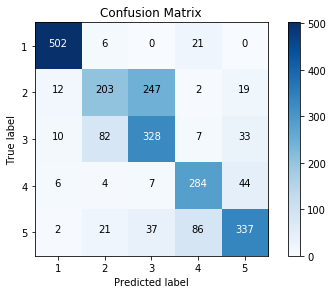

In [14]:
util.visualize_confusion_matrix(f_cm, classes)